<a href="https://colab.research.google.com/github/sameerraj227/Internship-Main_Flow_service/blob/main/DA_internship_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("student-mat.csv", delimiter=';')


In [46]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [47]:
# b. Data Exploration
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [48]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [49]:
print("\nShape of the dataset (rows, columns):")
print(df.shape)


Shape of the dataset (rows, columns):
(395, 33)


In [50]:
# c. Data Cleaning
df = df.fillna(df.median(numeric_only=True))

In [51]:
df = df.drop_duplicates()


In [52]:
# d. Data Analysis Questions

# 1. Average score in math (G3)
avg_g3 = df['G3'].mean()
print(f"\n1. Average final grade (G3): {avg_g3:.2f}")


1. Average final grade (G3): 10.42


In [53]:
# 2. Students scoring above 15 in final grade
above_15 = df[df['G3'] > 15].shape[0]
print(f"2. Number of students who scored above 15 in G3: {above_15}")

2. Number of students who scored above 15 in G3: 40


In [54]:

# 3. Correlation between study time and G3
correlation = df['studytime'].corr(df['G3'])
print(f"3. Correlation between study time and G3: {correlation:.2f}")

3. Correlation between study time and G3: 0.10


In [55]:
# 4. Gender-wise average final grade
gender_avg = df.groupby('sex')['G3'].mean()
print("4. Average G3 score by gender:")
print(gender_avg)

4. Average G3 score by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


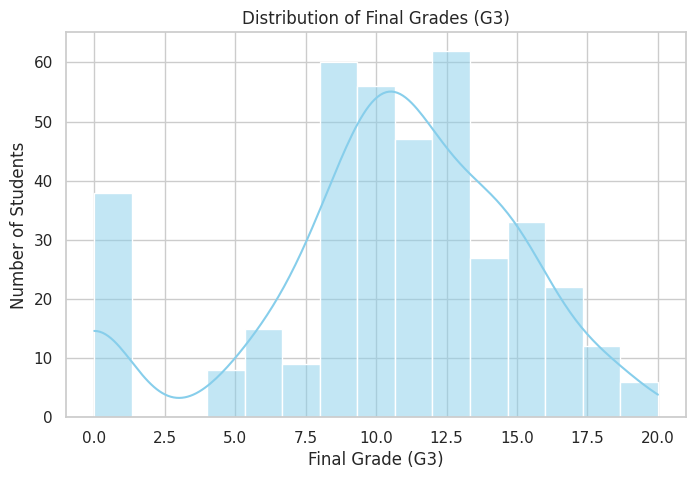

In [57]:
# 1. Histogram of final grades (G3)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()

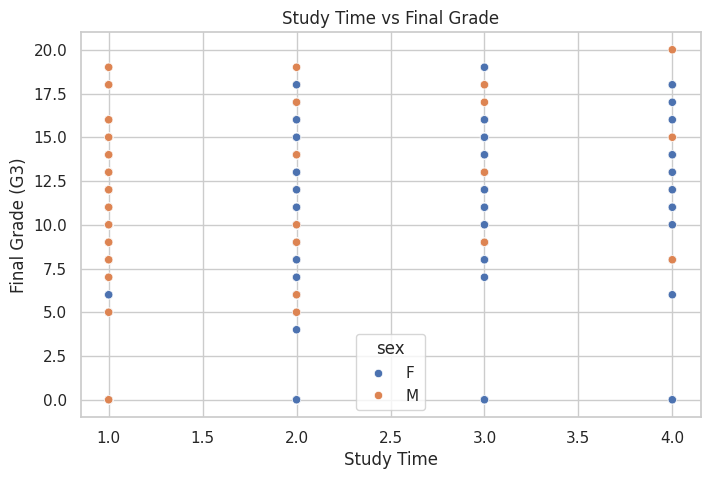

In [58]:
# 2. Scatter plot between study time and final grade
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=df, hue='sex', palette='deep')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

/tmp/ipython-input-59-3438922159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='pastel')


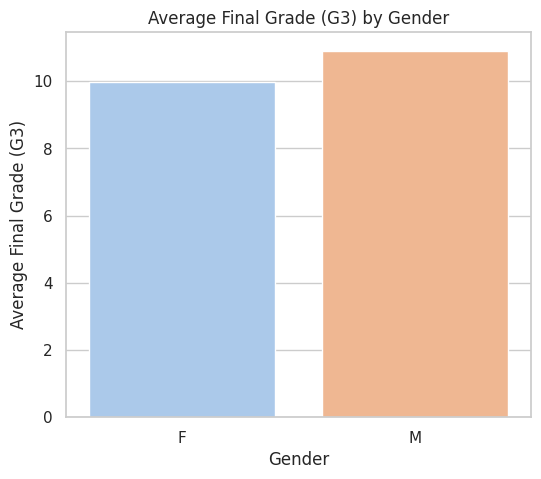

In [59]:
# 3. Bar chart comparing average scores by gender
gender_avg = df.groupby('sex')['G3'].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='pastel')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()